# AutoEncoder To Reduce The Dimensionality Of Image

Using mnist dataset.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, InputLayer, Dense

In [4]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
# converting of matrix to a vector to make it suitable for autoencoder input
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_train.shape

(60000, 784)

In [ ]:
# converting of matrix to a vector to make it suitable for autoencoder input
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_test.shape

(10000, 784)

In [9]:
model = Sequential() # autoencoder

model.add(InputLayer(shape= (784, )))
model.add(Dense(units= 32, activation= 'relu'))
model.add(Dense(units= 784, activation= 'sigmoid'))

In [10]:
model.compile(optimizer= tf.keras.optimizers.Adam(), loss= 'binary_crossentropy', metrics= ['accuracy'])

In [11]:
model.fit(
    x_train,
    x_train,
    epochs= 50,
    batch_size= 256,
    validation_data= (x_test, x_test)
)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0091 - loss: 0.3815 - val_accuracy: 0.0083 - val_loss: 0.1911
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0095 - loss: 0.1800 - val_accuracy: 0.0097 - val_loss: 0.1537
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0090 - loss: 0.1493 - val_accuracy: 0.0093 - val_loss: 0.1334
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0093 - loss: 0.1313 - val_accuracy: 0.0104 - val_loss: 0.1215
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0102 - loss: 0.1205 - val_accuracy: 0.0116 - val_loss: 0.1132
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0093 - loss: 0.1126 - val_accuracy: 0.0115 - val_loss: 0.1071
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0108 - loss: 0.1071 - val_accuracy: 0.0107 - val_loss: 0.1027
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0104 - loss: 0.1030 - val_accuracy: 0.

In [ ]:
original_dimension = Input(shape= (784,))
encoder_layer = model.layers[0]

encoder = Model(original_dimension, encoder_layer(original_dimension))

encoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,120 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,120 (98.12 KB)

 Trainable params: 25,120 (98.12 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
encoded_images = encoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step


In [17]:
decoded_images = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step


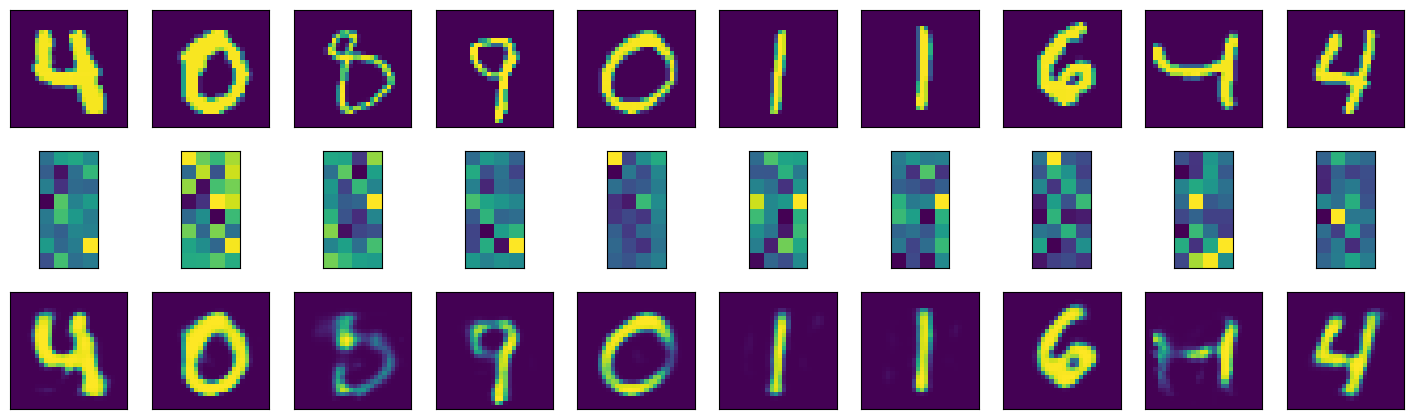

In [19]:
num_images = 10
images_test = np.random.randint(x_test.shape[0], size= num_images)

plt.figure(figsize= (18, 18))
for i, index_image in enumerate(images_test):
    # original image
    axis = plt.subplot(10, 10, i+1)
    plt.imshow(x_test[index_image].reshape(28, 28))
    plt.xticks(())
    plt.yticks(())

    # encoded image
    axis = plt.subplot(10, 10, i+1+num_images)
    plt.imshow(encoded_images[index_image].reshape(8, 4))
    plt.xticks(())
    plt.yticks(())

    # decoded image
    axis = plt.subplot(10, 10, i+1+num_images*2)
    plt.imshow(decoded_images[index_image].reshape(28, 28))
    plt.xticks(())
    plt.yticks(())